<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/main/250226_onset_%ED%9B%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install PyWavelets librosa matplotlib numpy
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pywt

import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

BoysLikeGirls.mp3

MagicCarpetRide_drum.mp3

Every Day.mp3

music.mp3 //꿈나라별나라

Love From The Other Side.mp3

## onset 추출(0226)

In [3]:
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)


In [4]:
# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 타격 시점 출력
print("Detected Onset Times:", onset_times)


Detected Onset Times: [  6.57124717   6.97759637   7.38394558   7.4768254    7.59292517
   7.69741497   7.79029478   8.18503401   8.38240363   8.59138322
   8.77714286   8.97451247   9.18349206   9.38086168   9.78721088
   9.99619048  10.19356009  10.37931973  10.56507937  10.69278912
  10.77405896  10.86693878  10.98303855  11.18040816  11.27328798
  11.40099773  11.49387755  11.59836735  11.78412698  11.9814966
  12.08598639  12.20208617  12.37623583  12.5968254   12.68970522
  12.78258503  12.88707483  12.99156463  13.38630385  13.58367347
  13.78104308  13.9784127   14.18739229  14.45442177  14.58213152
  14.95365079  15.17424036  15.38321995  15.58058957  15.77795918
  16.18430839  16.57904762  16.78802721  16.97378685  17.17115646
  17.38013605  17.77487528  18.18122449  18.3785941   18.5875737
  18.78494331  18.95909297  19.17968254  19.28417234  19.40027211
  19.78340136  19.99238095  20.38712018  20.56126984  20.96761905
  21.37396825  21.6061678   21.97768707  22.17505669  22

시각화

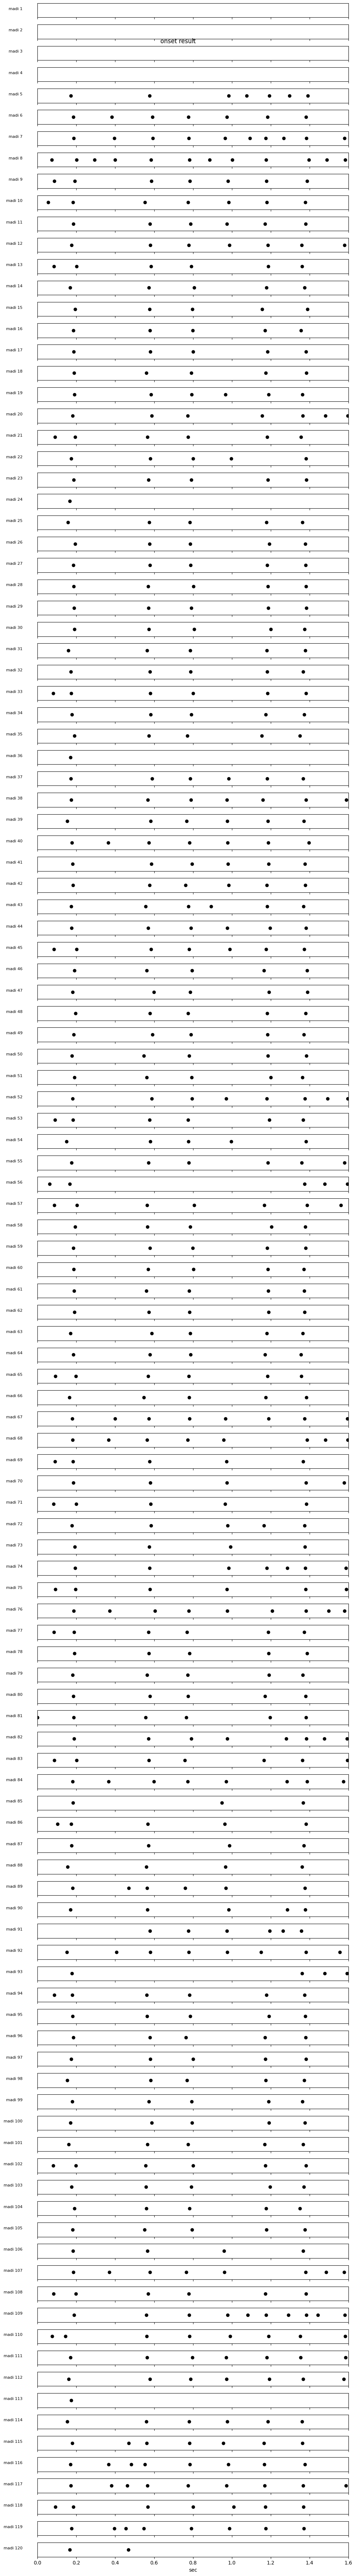

In [24]:
# 설정된 템포(BPM) 및 마디 길이 계산
BPM = 150  # 악보에 표시된 템포
beats_per_measure = 4  # 4/4 마디 기준
seconds_per_measure = (60 / BPM) * beats_per_measure  # 1 마디의 초 단위 길이
total_time = onset_times.max()  # 전체 곡 길이
num_measures = int(np.ceil(total_time / seconds_per_measure))  # 전체 마디 수

# 마디 구간 설정
measure_times = np.arange(0, num_measures * seconds_per_measure, seconds_per_measure)

# 시각화
fig, axes = plt.subplots(num_measures, 1, figsize=(10, num_measures * 0.6), sharex=True)

for i in range(num_measures):
    ax = axes[i] if num_measures > 1 else axes  # 마디별 서브플롯 선택
    start_time = measure_times[i]
    end_time = start_time + seconds_per_measure
    mask = (onset_times >= start_time) & (onset_times < end_time)  # 해당 마디에 속하는 온셋 선택
    ax.scatter(onset_times[mask] - start_time, np.zeros_like(onset_times[mask]), color="black", marker="o")  # 온셋 표시
    ax.set_xlim(0, seconds_per_measure)
    ax.set_yticks([])
    ax.set_ylabel(f"madi {i+1}", rotation=0, labelpad=30, fontsize=8, ha='right')

plt.xlabel("sec")
plt.suptitle("onset result", fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
print(onset_times)

[  6.57124717   6.97759637   7.38394558   7.4768254    7.59292517
   7.69741497   7.79029478   8.18503401   8.38240363   8.59138322
   8.77714286   8.97451247   9.18349206   9.38086168   9.78721088
   9.99619048  10.19356009  10.37931973  10.56507937  10.69278912
  10.77405896  10.86693878  10.98303855  11.18040816  11.27328798
  11.40099773  11.49387755  11.59836735  11.78412698  11.9814966
  12.08598639  12.20208617  12.37623583  12.5968254   12.68970522
  12.78258503  12.88707483  12.99156463  13.38630385  13.58367347
  13.78104308  13.9784127   14.18739229  14.45442177  14.58213152
  14.95365079  15.17424036  15.38321995  15.58058957  15.77795918
  16.18430839  16.57904762  16.78802721  16.97378685  17.17115646
  17.38013605  17.77487528  18.18122449  18.3785941   18.5875737
  18.78494331  18.95909297  19.17968254  19.28417234  19.40027211
  19.78340136  19.99238095  20.38712018  20.56126984  20.96761905
  21.37396825  21.6061678   21.97768707  22.17505669  22.59301587
  22.9761451

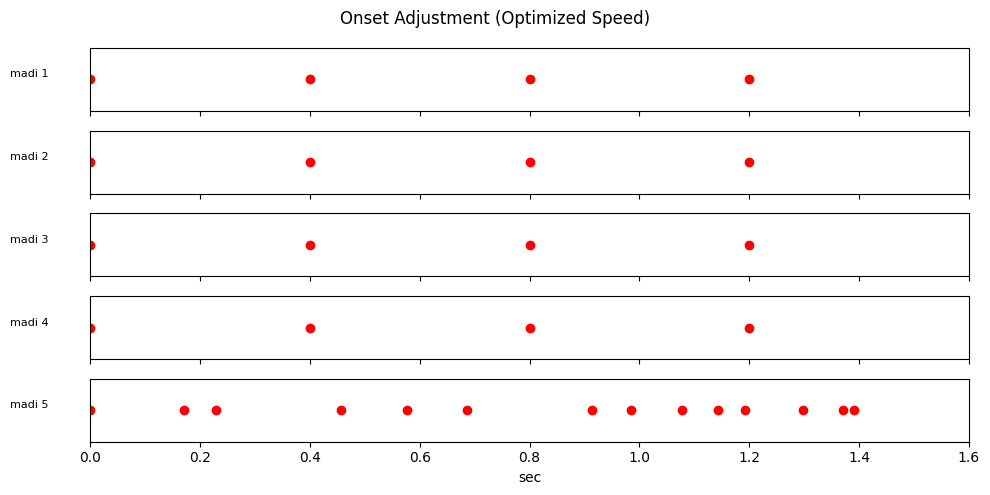

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def adjust_onsets_fast(onset_times, bpm=150, beats_per_measure=4, target_counts=[4, 8, 12]):
    seconds_per_measure = (60 / bpm) * beats_per_measure  # 1 마디의 초 단위 길이
    total_time = onset_times.max()  # 전체 곡 길이
    num_measures = int(np.ceil(total_time / seconds_per_measure))  # 전체 마디 수
    measure_times = np.arange(0, num_measures * seconds_per_measure, seconds_per_measure)
    adjusted_onsets = []

    for i in range(num_measures):
        start_time = measure_times[i]
        end_time = start_time + seconds_per_measure
        mask = (onset_times >= start_time) & (onset_times < end_time)
        measure_onsets = onset_times[mask]

        # 목표 개수 결정 (현재 개수와 가장 가까운 4, 8, 12 중 선택)
        current_count = len(measure_onsets)
        target_count = min(target_counts, key=lambda x: abs(x - current_count))

        if current_count < target_count:
            if current_count == 0:
                # 온셋이 없는 경우 마디 전체에서 균등 분포
                measure_onsets = np.linspace(start_time, end_time, target_count, endpoint=False)
            else:
                # 기존 온셋 유지하면서 부족한 개수만큼 균등하게 추가
                measure_onsets = np.sort(np.concatenate((measure_onsets, np.linspace(start_time, end_time, target_count))))

        adjusted_onsets.extend(measure_onsets)

    return np.array(adjusted_onsets)

# 온셋 보정 실행
adjusted_onset_times = adjust_onsets_fast(onset_times)

# 보정된 온셋 시각화
fig, axes = plt.subplots(5, 1, figsize=(10, 5), sharex=True)
measure_duration = (60 / 150) * 4

for i in range(5):
    ax = axes[i]
    start_time = i * measure_duration
    end_time = start_time + measure_duration
    mask = (adjusted_onset_times >= start_time) & (adjusted_onset_times < end_time)
    ax.scatter(adjusted_onset_times[mask] - start_time, np.zeros_like(adjusted_onset_times[mask]), color="red", marker="o")
    ax.set_xlim(0, measure_duration)
    ax.set_yticks([])
    ax.set_ylabel(f"madi {i+1}", rotation=0, labelpad=30, fontsize=8, ha='right')

plt.xlabel("sec")
plt.suptitle("Onset Adjustment (Optimized Speed)", fontsize=12)
plt.tight_layout()
plt.show()

쓰레기 코드!!!

## onset 균등 보정(0303)

In [5]:
print(onset_times)

[  6.57124717   6.97759637   7.38394558   7.4768254    7.59292517
   7.69741497   7.79029478   8.18503401   8.38240363   8.59138322
   8.77714286   8.97451247   9.18349206   9.38086168   9.78721088
   9.99619048  10.19356009  10.37931973  10.56507937  10.69278912
  10.77405896  10.86693878  10.98303855  11.18040816  11.27328798
  11.40099773  11.49387755  11.59836735  11.78412698  11.9814966
  12.08598639  12.20208617  12.37623583  12.5968254   12.68970522
  12.78258503  12.88707483  12.99156463  13.38630385  13.58367347
  13.78104308  13.9784127   14.18739229  14.45442177  14.58213152
  14.95365079  15.17424036  15.38321995  15.58058957  15.77795918
  16.18430839  16.57904762  16.78802721  16.97378685  17.17115646
  17.38013605  17.77487528  18.18122449  18.3785941   18.5875737
  18.78494331  18.95909297  19.17968254  19.28417234  19.40027211
  19.78340136  19.99238095  20.38712018  20.56126984  20.96761905
  21.37396825  21.6061678   21.97768707  22.17505669  22.59301587
  22.9761451

In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

In [5]:
def adjust_onsets_to_pattern(onset_times, target_counts=[4, 8, 12]):
    """
    온셋 개수를 4, 8, 12개 중 가장 가까운 값으로 보정하고,
    부족한 경우 기존 온셋의 중간 지점을 추가하여 채움.
    """
    current_count = len(onset_times)
    target_count = min(target_counts, key=lambda x: abs(x - current_count))

    if current_count < target_count:
        while len(onset_times) < target_count:
            new_onsets = []
            onset_times.sort()
            for j in range(len(onset_times) - 1):
                mid_point = (onset_times[j] + onset_times[j+1]) / 2
                if len(onset_times) + len(new_onsets) < target_count:
                    new_onsets.append(mid_point)
            onset_times = np.sort(np.concatenate((onset_times, new_onsets)))

    return onset_times

In [6]:
# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)


In [7]:
print(onset_times)

[  6.57124717   6.97759637   7.38394558   7.4768254    7.59292517
   7.69741497   7.79029478   8.18503401   8.38240363   8.59138322
   8.77714286   8.97451247   9.18349206   9.38086168   9.78721088
   9.99619048  10.19356009  10.37931973  10.56507937  10.69278912
  10.77405896  10.86693878  10.98303855  11.18040816  11.27328798
  11.40099773  11.49387755  11.59836735  11.78412698  11.9814966
  12.08598639  12.20208617  12.37623583  12.5968254   12.68970522
  12.78258503  12.88707483  12.99156463  13.38630385  13.58367347
  13.78104308  13.9784127   14.18739229  14.45442177  14.58213152
  14.95365079  15.17424036  15.38321995  15.58058957  15.77795918
  16.18430839  16.57904762  16.78802721  16.97378685  17.17115646
  17.38013605  17.77487528  18.18122449  18.3785941   18.5875737
  18.78494331  18.95909297  19.17968254  19.28417234  19.40027211
  19.78340136  19.99238095  20.38712018  20.56126984  20.96761905
  21.37396825  21.6061678   21.97768707  22.17505669  22.59301587
  22.9761451

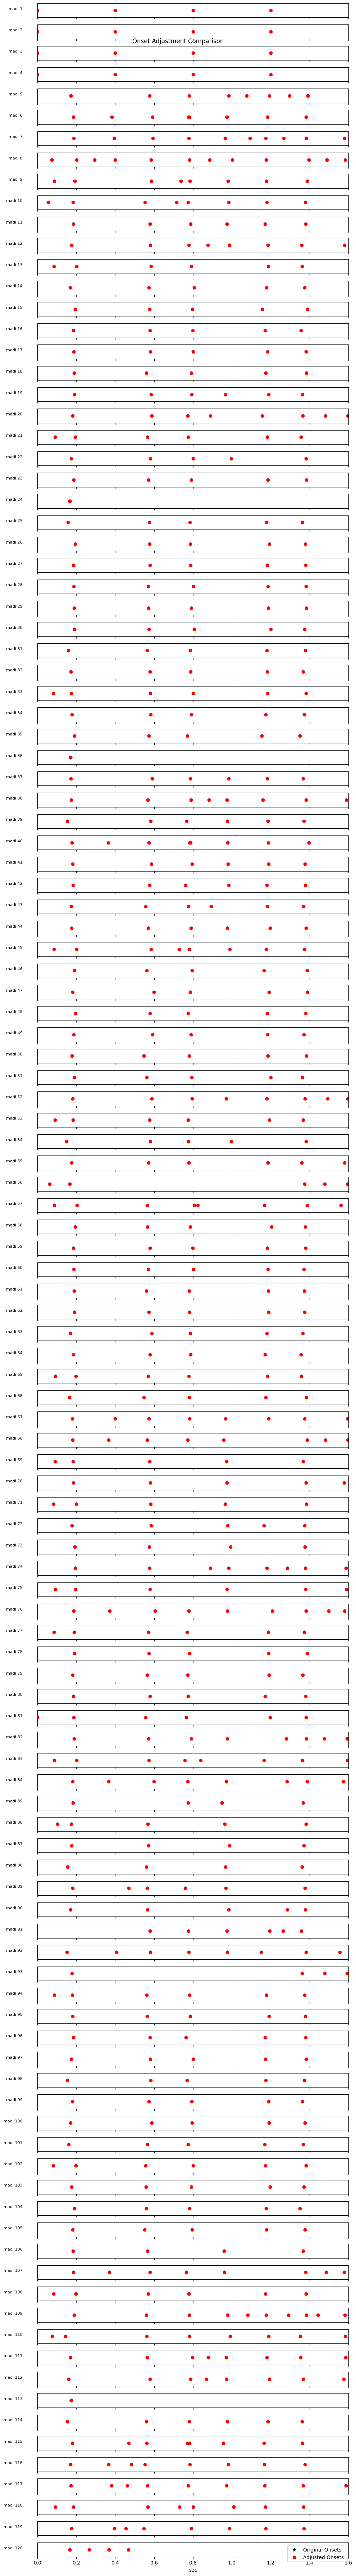

In [7]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def adjust_onsets_to_pattern(onset_times, bpm=150, beats_per_measure=4, target_counts=[4, 8, 12]):
    """
    온셋 개수를 4, 8, 12개 중 가장 가까운 값으로 보정하고,
    부족한 경우 기존 온셋의 중간 지점을 추가하여 채움.
    최적화: NumPy 연산 활용하여 속도 개선.
    """
    seconds_per_measure = (60 / bpm) * beats_per_measure
    total_time = onset_times.max()
    num_measures = int(np.ceil(total_time / seconds_per_measure))
    measure_times = np.arange(0, num_measures * seconds_per_measure, seconds_per_measure)
    adjusted_onsets = []

    for i in range(num_measures):
        start_time = measure_times[i]
        end_time = start_time + seconds_per_measure
        mask = (onset_times >= start_time) & (onset_times < end_time)
        measure_onsets = onset_times[mask]

        # 목표 개수 결정 (현재 개수와 가장 가까운 4, 8, 12 중 선택)
        current_count = len(measure_onsets)
        target_count = min(target_counts, key=lambda x: abs(x - current_count))

        if current_count < target_count:
            new_points_needed = target_count - current_count
            if current_count == 0:
                measure_onsets = np.linspace(start_time, end_time, target_count, endpoint=False)
            else:
                new_onsets = np.linspace(measure_onsets.min(), measure_onsets.max(), new_points_needed + 2)[1:-1]
                measure_onsets = np.sort(np.concatenate((measure_onsets, new_onsets)))

        adjusted_onsets.extend(measure_onsets)

    return np.array(adjusted_onsets), measure_times, seconds_per_measure

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 후보정 적용
adjusted_onset_times, measure_times, seconds_per_measure = adjust_onsets_to_pattern(onset_times)

# 결과 시각화
fig, axes = plt.subplots(len(measure_times), 1, figsize=(10, len(measure_times) * 0.6), sharex=True)

for i in range(len(measure_times)):
    ax = axes[i] if len(measure_times) > 1 else axes
    start_time = measure_times[i]
    end_time = start_time + seconds_per_measure
    mask_original = (onset_times >= start_time) & (onset_times < end_time)
    mask_adjusted = (adjusted_onset_times >= start_time) & (adjusted_onset_times < end_time)

    # 원래 온셋 (검은색)
    ax.scatter(onset_times[mask_original] - start_time, np.zeros_like(onset_times[mask_original]), color="black", marker="*", label="Original Onsets")

    # 보정된 온셋 (빨간색)
    ax.scatter(adjusted_onset_times[mask_adjusted] - start_time, np.zeros_like(adjusted_onset_times[mask_adjusted]), color="red", marker="o", label="Adjusted Onsets")

    ax.set_xlim(0, seconds_per_measure)
    ax.set_yticks([])
    ax.set_ylabel(f"madi {i+1}", rotation=0, labelpad=30, fontsize=8, ha='right')

plt.xlabel("sec")
plt.suptitle("Onset Adjustment Comparison", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


한 마디에 5,6개일 때 8개로 보정하는 로직 추가

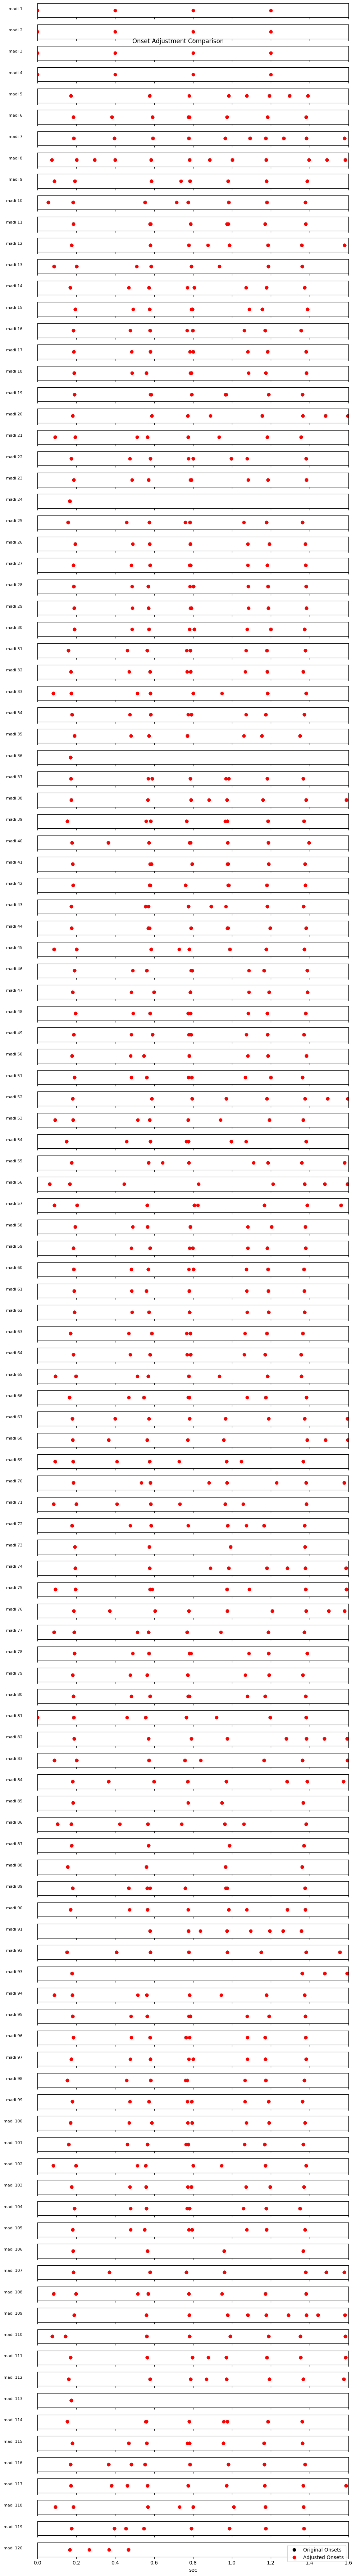

In [8]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def adjust_onsets_to_pattern(onset_times, bpm=150, beats_per_measure=4, target_counts=[4, 8, 12]):
    """
    온셋 개수를 4, 8, 12개 중 가장 가까운 값으로 보정하고,
    부족한 경우 기존 온셋의 중간 지점을 추가하여 채움.
    온셋 개수가 5, 6개일 경우 8개로 자동 보정하도록 수정.
    """
    seconds_per_measure = (60 / bpm) * beats_per_measure
    total_time = onset_times.max()
    num_measures = int(np.ceil(total_time / seconds_per_measure))
    measure_times = np.arange(0, num_measures * seconds_per_measure, seconds_per_measure)
    adjusted_onsets = []

    for i in range(num_measures):
        start_time = measure_times[i]
        end_time = start_time + seconds_per_measure
        mask = (onset_times >= start_time) & (onset_times < end_time)
        measure_onsets = onset_times[mask]

        # 목표 개수 결정 (5,6개일 경우 8개로 보정)
        current_count = len(measure_onsets)
        if current_count in [5, 6]:
            target_count = 8
        else:
            target_count = min(target_counts, key=lambda x: abs(x - current_count))

        if current_count < target_count:
            new_points_needed = target_count - current_count
            if current_count == 0:
                measure_onsets = np.linspace(start_time, end_time, target_count, endpoint=False)
            else:
                new_onsets = np.linspace(measure_onsets.min(), measure_onsets.max(), new_points_needed + 2)[1:-1]
                measure_onsets = np.sort(np.concatenate((measure_onsets, new_onsets)))

        adjusted_onsets.extend(measure_onsets)

    return np.array(adjusted_onsets), measure_times, seconds_per_measure

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 후보정 적용
adjusted_onset_times, measure_times, seconds_per_measure = adjust_onsets_to_pattern(onset_times)

# 결과 시각화
fig, axes = plt.subplots(len(measure_times), 1, figsize=(10, len(measure_times) * 0.6), sharex=True)

for i in range(len(measure_times)):
    ax = axes[i] if len(measure_times) > 1 else axes
    start_time = measure_times[i]
    end_time = start_time + seconds_per_measure
    mask_original = (onset_times >= start_time) & (onset_times < end_time)
    mask_adjusted = (adjusted_onset_times >= start_time) & (adjusted_onset_times < end_time)

    # 원래 온셋 (검은색)
    ax.scatter(onset_times[mask_original] - start_time, np.zeros_like(onset_times[mask_original]), color="black", marker="o", label="Original Onsets")

    # 보정된 온셋 (빨간색)
    ax.scatter(adjusted_onset_times[mask_adjusted] - start_time, np.zeros_like(adjusted_onset_times[mask_adjusted]), color="red", marker="o", label="Adjusted Onsets")

    ax.set_xlim(0, seconds_per_measure)
    ax.set_yticks([])
    ax.set_ylabel(f"madi {i+1}", rotation=0, labelpad=30, fontsize=8, ha='right')

plt.xlabel("sec")
plt.suptitle("Onset Adjustment Comparison", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


#보정 확정 코드!!!!! 온셋 추가 값 조정 + 10->12개 로직 추가

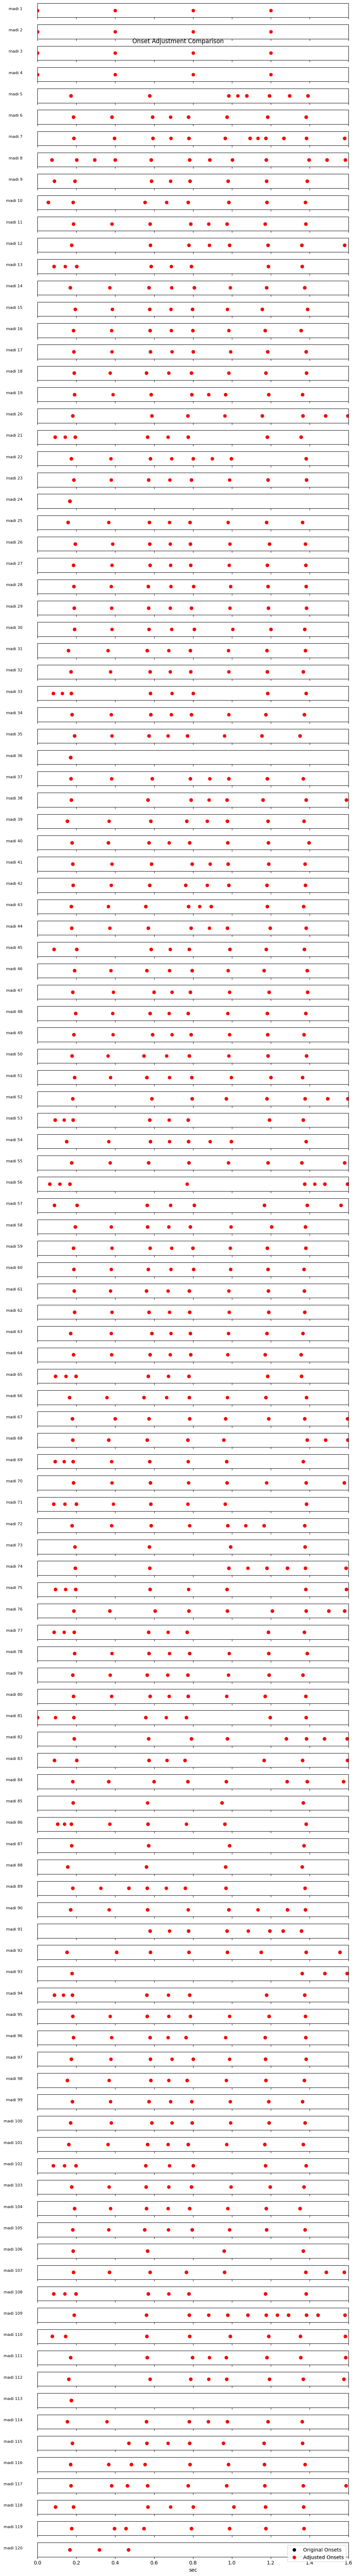

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def adjust_onsets_to_pattern(onset_times, bpm=150, beats_per_measure=4, target_counts=[4, 8, 12]):
    """
    온셋 개수를 4, 8, 12개 중 가장 가까운 값으로 보정하고,
    부족한 경우 기존 온셋의 중간 지점을 추가하여 채움.
    속도 최적화를 위해 NumPy 벡터 연산을 최대한 활용.
    """
    seconds_per_measure = (60 / bpm) * beats_per_measure
    total_time = onset_times.max()
    num_measures = int(np.ceil(total_time / seconds_per_measure))
    measure_times = np.arange(0, num_measures * seconds_per_measure, seconds_per_measure)
    adjusted_onsets = []

    for i in range(num_measures):
        start_time = measure_times[i]
        end_time = start_time + seconds_per_measure
        mask = (onset_times >= start_time) & (onset_times < end_time)
        measure_onsets = np.sort(onset_times[mask])

        # 목표 개수 결정 (5,6개일 경우 8개, 10개일 경우 12개로 보정)
        current_count = len(measure_onsets)
        if current_count in [5, 6]:
            target_count = 8
        elif current_count == 10:
            target_count = 12
        else:
            target_count = min(target_counts, key=lambda x: abs(x - current_count))

        if current_count < target_count:
            new_points_needed = target_count - current_count
            if current_count == 0:
                measure_onsets = np.linspace(start_time, end_time, target_count, endpoint=False)
            else:
                insert_positions = np.linspace(0, len(measure_onsets) - 1, new_points_needed + 2, dtype=int)[1:-1]
                new_onsets = (measure_onsets[insert_positions] + measure_onsets[insert_positions - 1]) / 2
                measure_onsets = np.sort(np.concatenate((measure_onsets, new_onsets)))

        adjusted_onsets.extend(measure_onsets)

    return np.array(adjusted_onsets), measure_times, seconds_per_measure

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 후보정 적용
adjusted_onset_times, measure_times, seconds_per_measure = adjust_onsets_to_pattern(onset_times)

# 결과 시각화
fig, axes = plt.subplots(len(measure_times), 1, figsize=(10, len(measure_times) * 0.6), sharex=True)

for i in range(len(measure_times)):
    ax = axes[i] if len(measure_times) > 1 else axes
    start_time = measure_times[i]
    end_time = start_time + seconds_per_measure
    mask_original = (onset_times >= start_time) & (onset_times < end_time)
    mask_adjusted = (adjusted_onset_times >= start_time) & (adjusted_onset_times < end_time)

    # 원래 온셋 (검은색)
    ax.scatter(onset_times[mask_original] - start_time, np.zeros_like(onset_times[mask_original]), color="black", marker="o", label="Original Onsets")

    # 보정된 온셋 (빨간색)
    ax.scatter(adjusted_onset_times[mask_adjusted] - start_time, np.zeros_like(adjusted_onset_times[mask_adjusted]), color="red", marker="o", label="Adjusted Onsets")

    ax.set_xlim(0, seconds_per_measure)
    ax.set_yticks([])
    ax.set_ylabel(f"madi {i+1}", rotation=0, labelpad=30, fontsize=8, ha='right')

plt.xlabel("sec")
plt.suptitle("Onset Adjustment Comparison", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
print(onset_times)

[  6.57124717   6.97759637   7.38394558   7.4768254    7.59292517
   7.69741497   7.79029478   8.18503401   8.38240363   8.59138322
   8.77714286   8.97451247   9.18349206   9.38086168   9.78721088
   9.99619048  10.19356009  10.37931973  10.56507937  10.69278912
  10.77405896  10.86693878  10.98303855  11.18040816  11.27328798
  11.40099773  11.49387755  11.59836735  11.78412698  11.9814966
  12.08598639  12.20208617  12.37623583  12.5968254   12.68970522
  12.78258503  12.88707483  12.99156463  13.38630385  13.58367347
  13.78104308  13.9784127   14.18739229  14.45442177  14.58213152
  14.95365079  15.17424036  15.38321995  15.58058957  15.77795918
  16.18430839  16.57904762  16.78802721  16.97378685  17.17115646
  17.38013605  17.77487528  18.18122449  18.3785941   18.5875737
  18.78494331  18.95909297  19.17968254  19.28417234  19.40027211
  19.78340136  19.99238095  20.38712018  20.56126984  20.96761905
  21.37396825  21.6061678   21.97768707  22.17505669  22.59301587
  22.9761451

## 온셋 segmentation

최적화

<ipython-input-7-66bf6b7739b5>:67: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


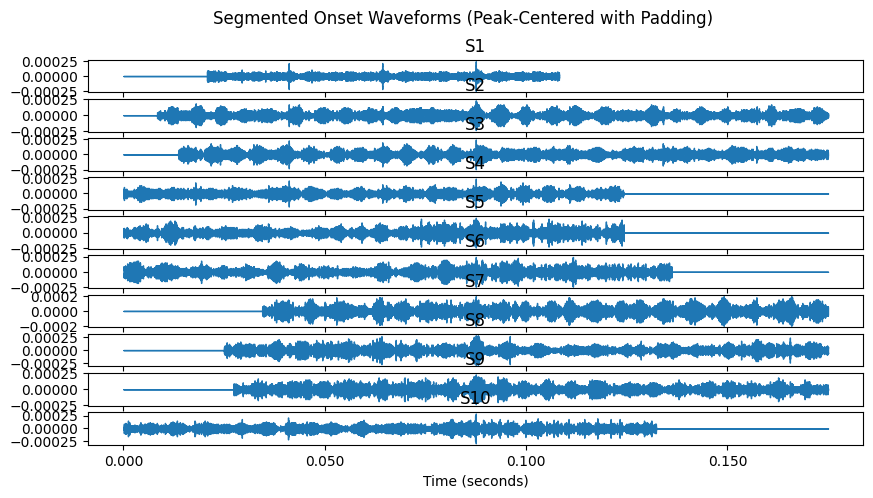

In [7]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt

def segment_audio(y, sr, onset_times, target_duration=0.175):
    """
    온셋을 기준으로 오디오를 세그먼트화하고, 각 세그먼트의 피크를 중앙으로 정렬하며,
    필요한 경우 패딩을 적용하여 일정한 길이로 맞추는 함수.
    """
    target_samples = int(target_duration * sr)  # 목표 길이 (샘플 단위 변환)
    half_target_samples = target_samples // 2
    segments = []

    for onset in onset_times:
        center_sample = int(onset * sr)
        start_sample = max(0, center_sample - half_target_samples)
        end_sample = min(len(y), center_sample + half_target_samples)

        segment = y[start_sample:end_sample]  # 오디오 자르기

        if len(segment) == 0:
            continue  # 빈 세그먼트 방지

        # 피크 찾기 (최대 에너지를 가진 샘플 위치 찾기)
        peak_index = np.argmax(np.abs(segment))
        shift_amount = half_target_samples - peak_index

        # 중앙 정렬 (피크를 중앙으로 이동)
        if shift_amount > 0:
            segment = np.pad(segment, (shift_amount, 0), mode='constant')[:target_samples]
        elif shift_amount < 0:
            segment = segment[-shift_amount:]
            if len(segment) < target_samples:
                segment = np.pad(segment, (0, target_samples - len(segment)), mode='constant')

        segments.append(segment)

    return segments

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 온셋 보정 (이전 단계에서 수행한 adjust_onsets_to_pattern 함수 사용)
adjusted_onset_times, measure_times, seconds_per_measure = adjust_onsets_to_pattern(onset_times)

# 오디오 세그먼트화
segments = segment_audio(y, sr, adjusted_onset_times, target_duration=0.175)

# 세그먼트 시각화 (앞의 10개 세그먼트만)
num_segments_to_plot = min(10, len(segments))
fig, axes = plt.subplots(num_segments_to_plot, 1, figsize=(10, num_segments_to_plot * 0.5), sharex=True)

for i in range(num_segments_to_plot):
    ax = axes[i] if num_segments_to_plot > 1 else axes
    librosa.display.waveshow(segments[i], sr=sr, ax=ax, max_points=5000)
    ax.set_title(f"S{i+1}")

plt.xlabel("Time (seconds)")
plt.suptitle("Segmented Onset Waveforms (Peak-Centered with Padding)")
plt.tight_layout()
plt.show()

# 세그먼트 저장
for i, segment in enumerate(segments):
    sf.write(f"segment_{i+1}.wav", segment, sr)


<ipython-input-9-40635be06757>:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


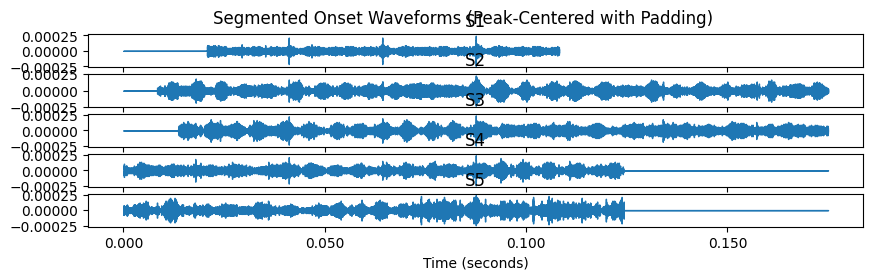

In [9]:
# 세그먼트 시각화 (앞의 10개 세그먼트만)
num_segments_to_plot = min(5, len(segments))
fig, axes = plt.subplots(num_segments_to_plot, 1, figsize=(10, num_segments_to_plot * 0.5), sharex=True)

for i in range(num_segments_to_plot):
    ax = axes[i] if num_segments_to_plot > 1 else axes
    librosa.display.waveshow(segments[i], sr=sr, ax=ax, max_points=5000)
    ax.set_title(f"S{i+1}")

plt.xlabel("Time (seconds)")
plt.suptitle("Segmented Onset Waveforms (Peak-Centered with Padding)")
plt.tight_layout()
plt.show()

<ipython-input-6-adc39d84dc69>:66: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


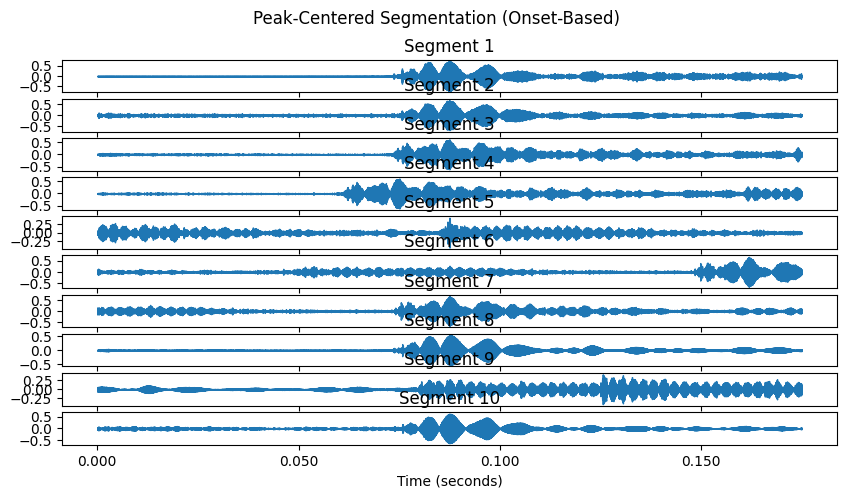

In [6]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt

def segment_audio_peak_aligned(y, sr, onset_times, window_size=0.175, search_window=0.05):
    """
    1. 온셋을 기준으로 일정 범위(±search_window) 내에서 피크를 찾음
    2. 피크를 중앙에 위치하도록 정렬
    3. 일정한 길이(window_size)로 자름
    """
    target_samples = int(window_size * sr)  # 세그먼트의 목표 길이 (샘플 수)
    search_samples = int(search_window * sr)  # 피크 탐색 범위 (샘플 수)
    half_target_samples = target_samples // 2
    segments = []

    for onset in onset_times:
        onset_sample = int(onset * sr)

        # 피크 찾을 범위 설정 (온셋 기준 ±search_window 초)
        search_start = max(0, onset_sample - search_samples)
        search_end = min(len(y), onset_sample + search_samples)
        segment_search = y[search_start:search_end]

        # 피크 찾기 (최대 에너지를 가진 샘플 위치)
        peak_relative_index = np.argmax(np.abs(segment_search))  # 검색 범위 내 피크 위치
        peak_sample = search_start + peak_relative_index  # 전체 신호에서의 피크 위치

        # 피크 중심으로 세그먼트 자르기
        start_sample = max(0, peak_sample - half_target_samples)
        end_sample = min(len(y), peak_sample + half_target_samples)
        segment = y[start_sample:end_sample]

        # 길이가 부족할 경우 패딩 추가
        if len(segment) < target_samples:
            pad_width = target_samples - len(segment)
            segment = np.pad(segment, (pad_width // 2, pad_width - pad_width // 2), mode='constant')

        segments.append(segment)

    return segments

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

# 온셋 검출
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 온셋을 기준으로 피크를 찾고 정렬하여 세그멘트화
segments = segment_audio_peak_aligned(y, sr, onset_times, window_size=0.175, search_window=0.05)

# 앞 10개 세그먼트 시각화
num_segments_to_plot = min(10, len(segments))
fig, axes = plt.subplots(num_segments_to_plot, 1, figsize=(10, num_segments_to_plot * 0.5), sharex=True)

for i in range(num_segments_to_plot):
    ax = axes[i] if num_segments_to_plot > 1 else axes
    librosa.display.waveshow(segments[i], sr=sr, ax=ax, max_points=5000)
    ax.set_title(f"Segment {i+1}")

plt.xlabel("Time (seconds)")
plt.suptitle("Peak-Centered Segmentation (Onset-Based)")
plt.tight_layout()
plt.show()

# 세그먼트 저장
for i, segment in enumerate(segments):
    sf.write(f"segment_{i+1}.wav", segment, sr)


<ipython-input-7-d76048f33136>:68: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


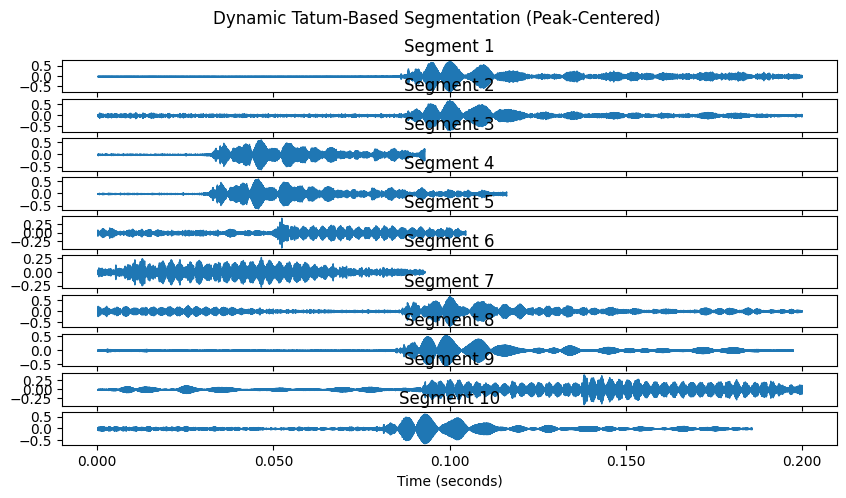

In [7]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt

def segment_audio_dynamic(y, sr, onset_times, max_duration=0.2, search_window=0.05):
    """
    1. 온셋과 다음 온셋 사이 간격으로 동적으로 길이 조정.
    2. 피크를 찾아 중앙에 정렬.
    3. 너무 긴 간격(최대 `max_duration` 초)을 초과하지 않도록 제한.
    """
    segments = []

    for i in range(len(onset_times) - 1):
        onset_sample = int(onset_times[i] * sr)
        next_onset_sample = int(onset_times[i + 1] * sr)

        # 다음 온셋과의 간격을 계산 (최대 max_duration 초)
        segment_length = min((next_onset_sample - onset_sample) / sr, max_duration)
        segment_samples = int(segment_length * sr)

        # 피크 찾을 범위 설정 (온셋 기준 ±search_window 초)
        search_start = max(0, onset_sample - int(search_window * sr))
        search_end = min(len(y), onset_sample + int(search_window * sr))
        segment_search = y[search_start:search_end]

        # 피크 찾기 (최대 에너지를 가진 샘플 위치)
        peak_relative_index = np.argmax(np.abs(segment_search))
        peak_sample = search_start + peak_relative_index  # 전체 신호에서의 피크 위치

        # 피크 중심으로 세그먼트 자르기
        start_sample = max(0, peak_sample - segment_samples // 2)
        end_sample = min(len(y), peak_sample + segment_samples // 2)
        segment = y[start_sample:end_sample]

        # 길이가 부족할 경우 패딩 추가
        if len(segment) < segment_samples:
            pad_width = segment_samples - len(segment)
            segment = np.pad(segment, (pad_width // 2, pad_width - pad_width // 2), mode='constant')

        segments.append(segment)

    return segments

# 오디오 파일 로드
audio_path = '/content/drive/My Drive/soundAI/music_separated_0218/BoysLikeGirls_하이브리드.wav'
y, sr = librosa.load(audio_path, sr=None)

# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 타격 간격을 반영하여 가변 길이 세그멘트 생성
segments = segment_audio_dynamic(y, sr, onset_times, max_duration=0.2, search_window=0.05)

# 앞 10개 세그먼트 시각화
num_segments_to_plot = min(10, len(segments))
fig, axes = plt.subplots(num_segments_to_plot, 1, figsize=(10, num_segments_to_plot * 0.5), sharex=True)

for i in range(num_segments_to_plot):
    ax = axes[i] if num_segments_to_plot > 1 else axes
    librosa.display.waveshow(segments[i], sr=sr, ax=ax, max_points=5000)
    ax.set_title(f"Segment {i+1}")

plt.xlabel("Time (seconds)")
plt.suptitle("Dynamic Tatum-Based Segmentation (Peak-Centered)")
plt.tight_layout()
plt.show()

# 세그먼트 저장
for i, segment in enumerate(segments):
    sf.write(f"segment_{i+1}.wav", segment, sr)
